## <center> Predicting House Sale Prices using Linear Regression Model </center>

In this project I've worked with housing data for the city of Ames, Iowa, United States from 2006 to 2010 and try to make predictions on the Sale price.
You can read more about the collected data [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_table('AmesHousing.tsv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.shape

(2930, 82)

#### Set up a pipeline of functions that would let us quickly iterate on different models 

In [4]:
def transform_features(data):
    return data

def select_features(data):
    return data[['Gr Liv Area','SalePrice']]

def train_and_test(data):
    train= data[:1460]
    test= data[1460:]
    
# Selection of Numerical columns from both dataframes.
    numerical_train= train.select_dtypes([float,int])
    numerical_test= test.select_dtypes([float,int])

# Removed SalePrice column from new dataframes.
    features = numerical_train.columns.tolist()
    features.remove("SalePrice")

# Train the model
    lr= LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    test_predictions= lr.predict(test[features])
    
    mse= mean_squared_error(test['SalePrice'], test_predictions)
    rsq= r2_score(test['SalePrice'], test_predictions)
    
    print('R square: ' , round(rsq,3))
    
    rmse= mse ** 0.5
    return  rmse

##### Calling these functions

In [5]:
transform_df = transform_features(data)
new_df = select_features(transform_df)
rmse = train_and_test(new_df)
print('The RMSE of given model is: {:.3f}'.format(rmse))

R square:  0.507
The RMSE of given model is: 57088.252


### Feature Engineering

In [6]:
# Before transforming df.
data.isnull().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

#### Removed any columns with more than 25% missing values.

In [7]:
null_col= data.isnull().sum()
null_col

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [8]:
# Removed cols having more than 5% of missing values.
dropping_columns= data[null_col[null_col > len(data)*(5/100)].index]

In [9]:
data= data.drop(dropping_columns, axis= 'columns')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [10]:
# After tranforming
data.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
                   ..
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces

###### Object columns to be dropped

In [11]:
str_count = data.select_dtypes('object').isnull().sum()
str_count

MS Zoning          0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      23
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Heating            0
Heating QC         0
Central Air        0
Electrical         1
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Sale Condition     0
dtype: int64

In [12]:
drop_missing_cols = str_count[str_count != 0]

In [13]:
data = data.drop(drop_missing_cols.index, axis=1)

#### For Numerical columns with missing values, filled in with the most common value in that column.

In [14]:
# Imputation for the Numerical columns containing less than 5% missing values.

num_columns= data.select_dtypes([int,float]).isnull().sum()

num_missing= num_columns[num_columns>0 & (num_columns<len(data)*(5/100))]

num_missing.sort_values()


BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [15]:
# Computed the most common value for each column in num_missing, converted this series into dict.

val_mode= data[num_missing.index].mode() # computed mode for common occurrence.
val_mode

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [16]:
val_dict= val_mode.to_dict(orient='record')[0]
val_dict

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [17]:
data= data.fillna(val_dict)
num_missing.isnull().sum()

0

#### Added a new feature as per house sold data.

In [18]:
years_sold= data['Yr Sold'] - data['Year Built']
years_sold

0       50
1       49
2       52
3       42
4       13
5       12
6        9
7       18
8       15
9       11
10      17
11      18
12      12
13      20
14      25
15       7
16      22
17       0
18      59
19      32
20      33
21      36
22      10
23      40
24      39
25      42
26      40
27      39
28      11
29      39
        ..
2900     1
2901     1
2902     1
2903    55
2904     9
2905     8
2906     8
2907     0
2908    29
2909    29
2910    33
2911    38
2912    36
2913    36
2914    34
2915    37
2916    36
2917    36
2918    36
2919    36
2920    36
2921    30
2922    30
2923    29
2924    46
2925    22
2926    23
2927    14
2928    32
2929    13
Length: 2930, dtype: int64

In [19]:
years_sold_ren= data['Yr Sold'] - data['Year Remod/Add']
years_sold_ren

0       50
1       49
2       52
3       42
4       12
5       12
6        9
7       18
8       14
9       11
10      16
11       3
12      12
13      20
14      25
15       7
16       5
17       0
18      59
19      22
20      33
21      36
22      10
23      40
24       2
25      42
26      40
27      39
28      11
29      39
        ..
2900     0
2901     0
2902     0
2903    55
2904     9
2905     8
2906     8
2907     0
2908    29
2909    29
2910    33
2911     3
2912    36
2913    36
2914    34
2915    27
2916    36
2917    36
2918    36
2919    36
2920    36
2921    30
2922    30
2923    29
2924    10
2925    22
2926    23
2927    14
2928    31
2929    12
Length: 2930, dtype: int64

In [20]:
years_sold[years_sold<0]

2180   -1
dtype: int64

In [21]:
years_sold_ren[years_sold_ren<0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [22]:
data['years_sold']= years_sold
data['years_sold_ren']= years_sold_ren

In [23]:
# Removed row values having negative data
data= data.drop([1702,2180,2181], axis= 'index')

In [24]:
# Dropped 'Year Built', 'Year Remod/Add' columns as they don't need now.
data= data.drop(['Year Built', 'Year Remod/Add'], axis=1)

In [25]:
# Removed columns that leak information about the sale.
data= data.drop(["Mo Sold",'Sale Type', "Sale Condition",'Yr Sold'], axis=1)

In [26]:
# Remove columns which are not providing any relative info to ML.
data= data.drop(["PID","Order","Enclosed Porch"], axis=1)

### Update transform_features function!

In [31]:
def transform_features(data):
    
# remove col having more than 5% of missing values.
    null_col= data.isnull().sum()
    dropping_columns= data[null_col[null_col > len(data)*(5/100)].index]
    data= data.drop(dropping_columns, axis=1)
    
# Imputation for Numerical columns contain less than 5% missing values.
    num_columns= data.select_dtypes([int,float]).isnull().sum()
    num_missing= num_columns[num_columns>0 & (num_columns<len(data)*(5/100))]
    val_dict = data[num_missing.index].mode().to_dict(orient='records')[0]    
    data= data.fillna(val_dict)
    
# Obj columns to be dropped
    str_count = data.select_dtypes(object).isnull().sum()
    drop_missing_cols = str_count[str_count > 0]
    data = data.drop(drop_missing_cols.index, axis=1)
    
#     years_sold= data['Yr Sold'] - data['Year Built']
#     years_sold_ren= data['Yr Sold'] - data['Year Remod/Add']
#     data['years_sold']= years_sold
#     data['years_sold_ren']= years_sold_ren

#     data= data.drop([1702,2180,2181], axis=0)
    
#     data= data.drop(["Mo Sold",'Sale Type', "Sale Condition",'Yr Sold'], axis=1)

#     data= data.drop(["PID","Order",'Enclosed Porch'], axis=1)    
     
    return data

def select_features(data):
    return data[['Gr Liv Area','SalePrice']]

def train_and_test(data):
    train= data[:1460]
    test= data[1460:]
    
# Selection of Numerical columns from both dataframes.
    numerical_train= train.select_dtypes(include=['float','integer'])
    numerical_test= test.select_dtypes(include=['float','integer'])

# Remove SalePrice column from new dataframes.

    features = numerical_train.columns.tolist()
    features.remove("SalePrice")

# Train the model
    lr= LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions= lr.predict(test[features])
    mse= mean_squared_error(test['SalePrice'], test_predictions)
    rsq= r2_score(test['SalePrice'], test_predictions)
    print('R square: ' , round(rsq,3))
    rmse= mse ** 0.5
    return  rmse

transform_df = transform_features(data)
new_df = select_features(transform_df)
rmse = train_and_test(new_df)
print('The RMSE of given model is: {:.3f}'.format(rmse))


R square:  0.539
The RMSE of given model is: 55275.367


### Feature Selection

In [32]:
num_train= transform_df.select_dtypes([float,int]) # selecting num cols.

cor_train_df= num_train.corr() # calculated correlation of num cols

cor_saleprice= abs(cor_train_df.SalePrice) # correlation with target col

In [33]:
# Kept columns having correlation greater than 0.3 with Saleprice col.
strong_cor= cor_saleprice[cor_saleprice > 0.3]
strong_cor

Overall Qual      0.801206
Mas Vnr Area      0.506983
BsmtFin SF 1      0.439284
Total Bsmt SF     0.644012
1st Flr SF        0.635185
Gr Liv Area       0.717596
Full Bath         0.546118
TotRms AbvGrd     0.498574
Fireplaces        0.474831
Garage Cars       0.648361
Garage Area       0.641425
Wood Deck SF      0.328183
Open Porch SF     0.316262
SalePrice         1.000000
years_sold        0.558979
years_sold_ren    0.534985
Name: SalePrice, dtype: float64

In [34]:
corrmat= transform_df[strong_cor.index].corr()
corrmat

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,years_sold,years_sold_ren
Overall Qual,1.000000,0.418972,0.278274,0.545792,0.474888,0.567902,0.520942,0.376199,0.391604,0.598485,0.561303,0.253120,0.290553,0.801206,-0.596358,-0.570231
Mas Vnr Area,0.418972,1.000000,0.284305,0.378545,0.376205,0.387355,0.252318,0.267328,0.267449,0.354753,0.365786,0.158743,0.123395,0.506983,-0.306163,-0.190821
BsmtFin SF 1,0.278274,0.284305,1.000000,0.522775,0.439662,0.188245,0.073805,0.030338,0.293897,0.252932,0.303824,0.216577,0.105248,0.439284,-0.278070,-0.148456
Total Bsmt SF,0.545792,0.378545,0.522775,1.000000,0.792227,0.426689,0.324943,0.266420,0.331919,0.438589,0.482306,0.222595,0.222762,0.644012,-0.409209,-0.298629
1st Flr SF,0.474888,0.376205,0.439662,0.792227,1.000000,0.546943,0.372838,0.377083,0.406965,0.441002,0.488603,0.218907,0.212943,0.635185,-0.310902,-0.241824
Gr Liv Area,0.567902,0.387355,0.188245,0.426689,0.546943,1.000000,0.633355,0.806092,0.455685,0.489469,0.480458,0.244285,0.321770,0.717596,-0.240369,-0.317779
Full Bath,0.520942,0.252318,0.073805,0.324943,0.372838,0.633355,1.000000,0.528647,0.229024,0.477338,0.405233,0.178688,0.255378,0.546118,-0.468171,-0.456866
TotRms AbvGrd,0.376199,0.267328,0.030338,0.266420,0.377083,0.806092,0.528647,1.000000,0.300400,0.353491,0.322227,0.148608,0.222813,0.498574,-0.110243,-0.197317
Fireplaces,0.391604,0.267449,0.293897,0.331919,0.406965,0.455685,0.229024,0.300400,1.000000,0.320042,0.292294,0.226145,0.155353,0.474831,-0.169608,-0.132631
Garage Cars,0.598485,0.354753,0.252932,0.438589,0.441002,0.489469,0.477338,0.353491,0.320042,1.000000,0.888866,0.239666,0.200440,0.648361,-0.536616,-0.426134


#### Correlation heatmap matrix

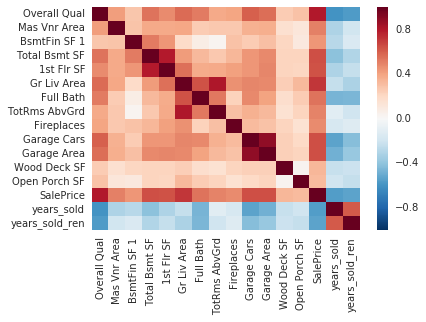

In [35]:
%matplotlib inline 
sns.heatmap(corrmat)

#### Dropped cols with low corr.

In [36]:
transform_df= transform_df.drop(cor_saleprice[cor_saleprice < 0.3].index, axis=1)

#### Categorical columns

In [37]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 41 columns):
MS Zoning         2927 non-null object
Street            2927 non-null object
Lot Shape         2927 non-null object
Land Contour      2927 non-null object
Utilities         2927 non-null object
Lot Config        2927 non-null object
Land Slope        2927 non-null object
Neighborhood      2927 non-null object
Condition 1       2927 non-null object
Condition 2       2927 non-null object
Bldg Type         2927 non-null object
House Style       2927 non-null object
Overall Qual      2927 non-null int64
Roof Style        2927 non-null object
Roof Matl         2927 non-null object
Exterior 1st      2927 non-null object
Exterior 2nd      2927 non-null object
Mas Vnr Area      2927 non-null float64
Exter Qual        2927 non-null object
Exter Cond        2927 non-null object
Foundation        2927 non-null object
BsmtFin SF 1      2927 non-null float64
Total Bsmt SF     2927 non-null fl

In [38]:
''' List of column names categorized as nominal variables are 
candidates for being converted to categorical '''

nominal_features = ["PID","MS SubClass", "MS Zoning", "Street", "Land Contour","Lot Shape", "Lot Config", "Neighborhood", "Land Contour",
                    "Condition 1", "Condition 2", "Bldg Type","Utilities", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Exter Cond", "Foundation", "Heating", "Central Air", "Garage Type","Fence" 
                    "Misc Feature", "Sale Type", "Sale Condition","Electrical"]
         
# Cols from above list are available to us or not.

transform_col_list= list()

for col in nominal_features:
    if col in transform_df.columns:
        transform_col_list.append(col)
        
transform_col_list    

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Shape',
 'Lot Config',
 'Neighborhood',
 'Land Contour',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'Utilities',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Cond',
 'Foundation',
 'Heating',
 'Central Air']

In [39]:
# Used "transform_col_list" to count unique counts in each categorical column.

unique_count= transform_df[transform_col_list].apply(lambda col: len(col.value_counts()))
unique_count

MS Zoning        7
Street           2
Land Contour     4
Lot Shape        4
Lot Config       5
Neighborhood    28
Land Contour     4
Condition 1      9
Condition 2      8
Bldg Type        5
Utilities        3
House Style      8
Roof Style       6
Roof Matl        8
Exterior 1st    16
Exterior 2nd    17
Exter Cond       5
Foundation       6
Heating          6
Central Air      2
dtype: int64

In [40]:
# Drop the  categorical columns having more than 10 unique values.

drop_col= transform_df[unique_count[unique_count>10].index]
transform_df.drop(drop_col, axis=1, inplace=True)

In [41]:
# Select obj cols to be converted into category type.

text_cols = transform_df.select_dtypes(object)

for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')

In [42]:
# Computed dummy columns and added back to the dataframe!
for col in text_cols:

    dummy_cols= pd.get_dummies(transform_df[col])
    transform_df= pd.concat([transform_df,dummy_cols], axis=1)

In [43]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Columns: 154 entries, MS Zoning to Y
dtypes: category(22), float64(5), int64(11), uint8(116)
memory usage: 788.1 KB


In [45]:
def transform_features(data):
# remove col having more than 5% of missing values.
    null_col= data.isnull().sum()
    dropping_columns= data[null_col[null_col > len(data)*(5/100)].index]
    data= data.drop(dropping_columns, axis=1)
    
# Imputation for Numerical columns contain less than 5% missing values.
    num_columns= data.select_dtypes([int,float]).isnull().sum()
    num_missing= num_columns[num_columns>0 & (num_columns<len(data)*(5/100))]
    val_dict = data[num_missing.index].mode().to_dict(orient='records')[0]    
    data= data.fillna(val_dict)
    num_missing.isnull().sum()
# Obj columns to be dropped
    str_count = data.select_dtypes(object).isnull().sum()
    drop_missing_cols = str_count[str_count > 0]
    data = data.drop(drop_missing_cols.index, axis=1)
    
#     years_sold= data['Yr Sold']-data['Year Built']
#     years_sold_ren= data['Yr Sold']-data['Year Remod/Add']
#     data['years_sold']= years_sold
#     data['years_sold_ren']= years_sold_ren

#     data= data.drop([1702,2180,2181], axis=0)
    
#     data= data.drop(["Mo Sold",'Sale Type', "Sale Condition",'Yr Sold'], axis=1)

#     data= data.drop(["PID","Order",'Enclosed Porch'], axis=1)    
     
    return data

def select_features(data):
    
    num_train= data.select_dtypes([float,int]) # selecting num cols.
    cor_train_df= num_train.corr() # calculated correlation of num cols
    cor_saleprice= abs(cor_train_df.SalePrice)
    data= data.drop(cor_saleprice[cor_saleprice < 0.3].index, axis=1)
    
    return data

def train_and_test(data):
    train= data[:1460]
    test= data[1460:]
    
# Selection of Numerical columns from both dataframes.
    numerical_train= train.select_dtypes([float,int])
    numerical_test= test.select_dtypes([float,int])

# Remove SalePrice column from new dataframes.

    features = numerical_train.columns.tolist()
    features.remove("SalePrice")

# Train the model
    lr= LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions= lr.predict(test[features])
    mse= mean_squared_error(test['SalePrice'], test_predictions)
    rsq= r2_score(test['SalePrice'], test_predictions)
    print('R square: ' , round(rsq,3))
    rmse= mse ** 0.5
    return  rmse

transform_df = transform_features(data)
new_df = select_features(transform_df)
rmse = train_and_test(new_df)
print('The RMSE of given model is: {:.3f}'.format(rmse))


R square:  0.798
The RMSE of given model is: 36607.880


As per the R square this model is 80% accurate and Linear Regression model tends to less overfit so this model is fairly good enough.